# NanoEventsFactory example

Load a single local root file and play with the events.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

from coffea.nanoevents import NanoEventsFactory, BaseSchema

In [3]:
events = NanoEventsFactory.from_root(
    '/home/users/dspitzba/timing/CMSSW_11_3_1_patch1/src/Phase2Timing/ntuple_phase2timing_H_XX_4b.root',
    schemaclass = BaseSchema,
    treepath='demo/tree',
    entry_stop = 1000).events()

In [4]:
events['q_pt'][0]

<Array [81.2, 39.4, 10.2, 46.8] type='4 * float32[parameters={"__doc__": "q_pt"}]'>

In [5]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak

In [6]:
import boost_histogram as bh

In [7]:
binning = np.linspace(0,100,11)

lead_q_pt = bh.Histogram(bh.axis.Variable(binning), storage=bh.storage.Weight())
lead_q_pt.fill(
    ak.max(events['q_pt'], axis=1),
    weight=np.ones_like(ak.max(events['q_pt'], axis=1)),
)

trail_q_pt = bh.Histogram(bh.axis.Variable(binning), storage=bh.storage.Weight())
trail_q_pt.fill(
    ak.min(events['q_pt'], axis=1),
    weight=np.ones_like(ak.max(events['q_pt'], axis=1)),
)

Histogram(Variable([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]), storage=Weight()) # Sum: WeightedSum(value=200, variance=200)

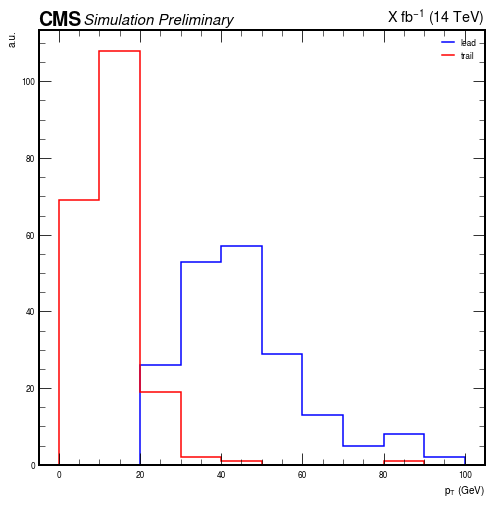

In [15]:
f, ax = plt.subplots(figsize=(8, 8))

hep.histplot(
    [lead_q_pt.counts(), trail_q_pt.counts()],
    binning,
    histtype="step",
    stack=False,
    label=[r'lead', r'trail'],
    color=['blue', 'red'],
    ax=ax,
    )

hep.cms.label(
    "Preliminary",
    data=False,
    lumi='X',
    com=14,
    loc=0,
    ax=ax,
    fontsize=15,
)

ax.set_ylabel(r'a.u.')
ax.set_xlabel(r'$p_{T}\ (GeV)$')

plt.legend()